In [1]:
import sys
sys.path.append('./qick/qick_lib/')
sys.path.append('./soft/')

from mkids import *

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from numpy.fft import fft, fftshift

In [2]:
# Initialize Firmware.
soc = MkidsSoc('./mkids_v3.bit',force_init_clks=True)

# Print information.
print(soc)

resetting clocks: 245.76 491.52

QICK configuration:

	Board: RFSoC4x2

	Dual Chains
	Dual 0: 
		ADC: 224_0, fs = 4915.2 MHz, Decimation    = 4
		DAC: 228_0, fs = 4915.2 MHz, Interpolation = 4
		PFB: fs = 38.4 MHz, fc = 19.2 MHz, 64 channels

	Sim Chains
	Sim 0: 
		ADC: 224_1, fs = 4915.2 MHz, Decimation    = 4
		DAC: 230_0, fs = 4915.2 MHz, Interpolation = 4
		PFB: fs = 9.6 MHz, fc = 4.8 MHz, 256 channels


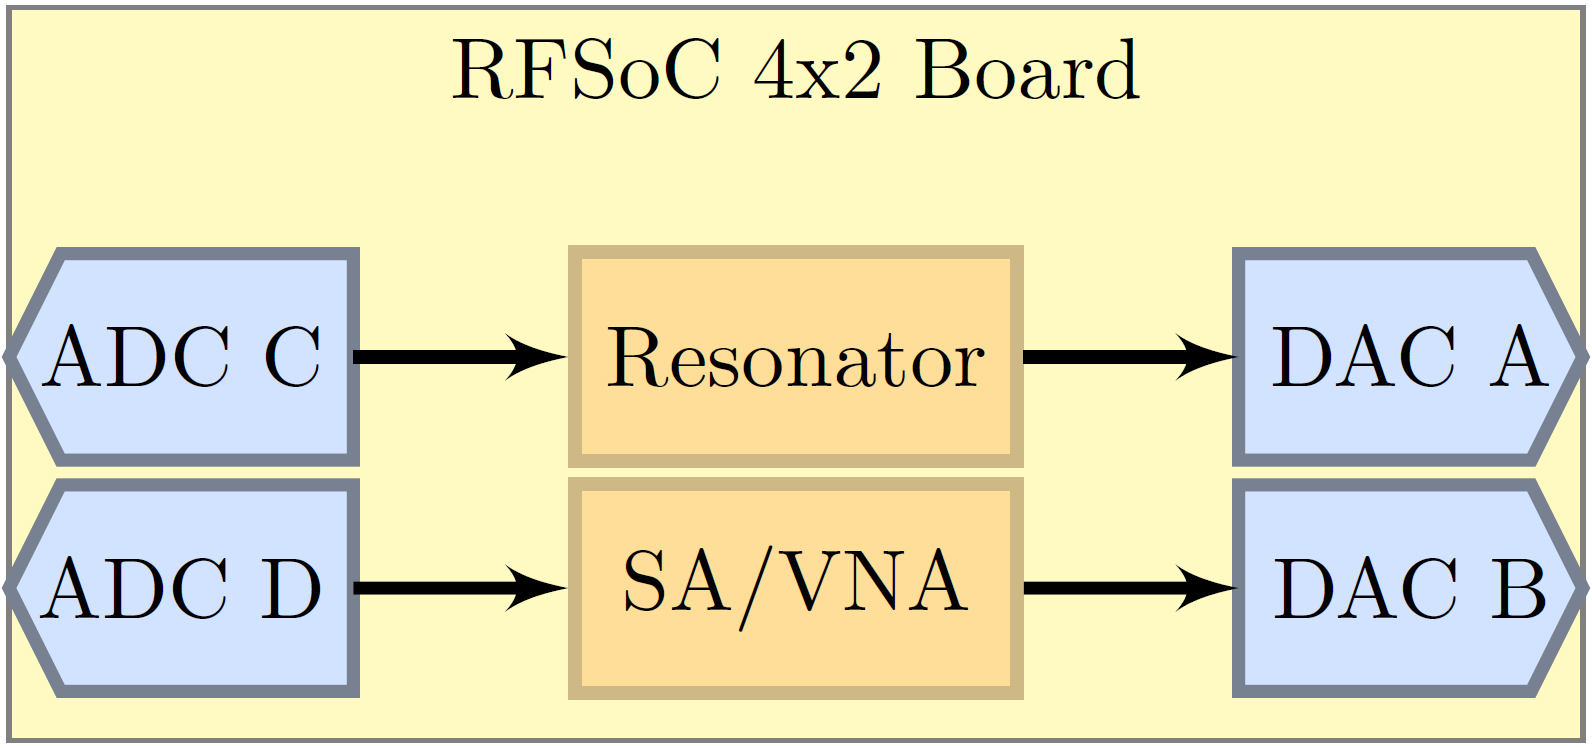

In [3]:
from IPython.display import Image, display
display(Image(filename='rfsoc4x2_mkids_v3.png', embed=True))

In [4]:
#####################
### Chain Example ###
#####################
# Build processing chain.
chain = KidsChain(soc, dual=soc['dual'][0])

# Build filter chain.
simu = SimuChain(soc, simu=soc['simu'][0])

In [11]:
###############################
### Resonator Configuration ###
###############################
# Set quantization.
qout = 1
simu.analysis.qout(qout)
simu.synthesis.qout(qout)

# Set mixer.
fmix = 1000
simu.set_mixer_frequency(fmix)

# Bypass resonators.
simu.alloff()

# Enable resonator.
simu.enable(1200)

Starting sweep:
  * Start      : 1190.0 MHz
  * End        : 1210.0 MHz
  * Resolution : 0.10050251256279807 MHz
  * Points     : 200
 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,

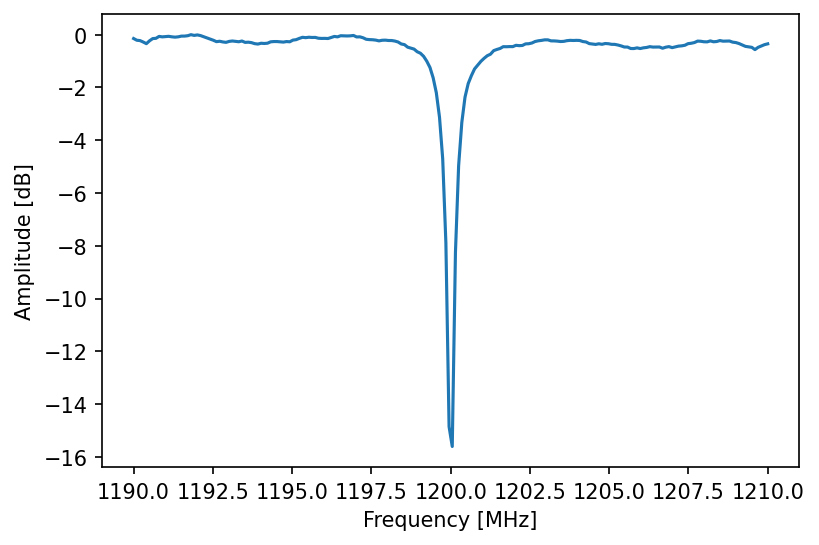

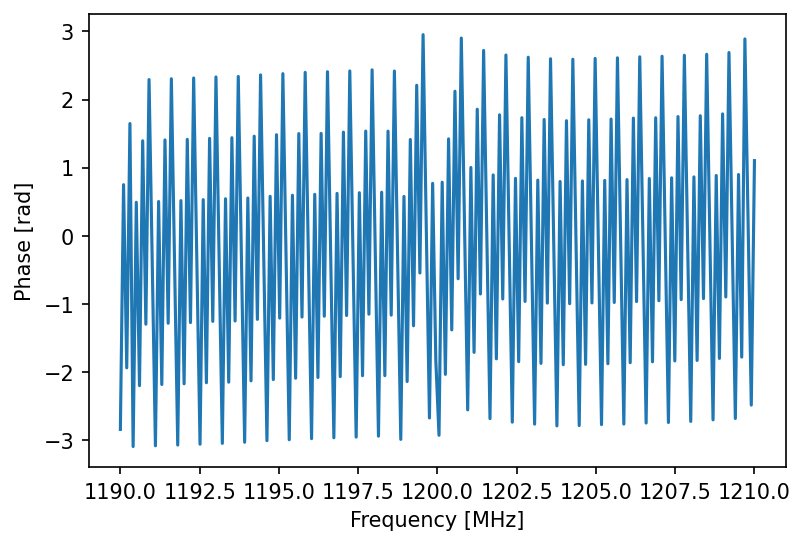

In [12]:
#######################
### Frequency Sweep ###
#######################
chain.analysis.qout(2)
chain.synthesis.qout(2)
fc = 1200
df = 20
f,a,phi=chain.sweep(fc-df/2,fc+df/2,N=200,g=0.1)

plt.figure(dpi=150)
plt.plot(f,20*np.log10(a/max(a)))
#plt.ylim([-60,10])
plt.xlabel("Frequency [MHz]");
plt.ylabel("Amplitude [dB]");
#plt.savefig('vna_1.jpg')

plt.figure(dpi=150)
plt.plot(f,phi)
plt.xlabel("Frequency [MHz]");
plt.ylabel("Phase [rad]");

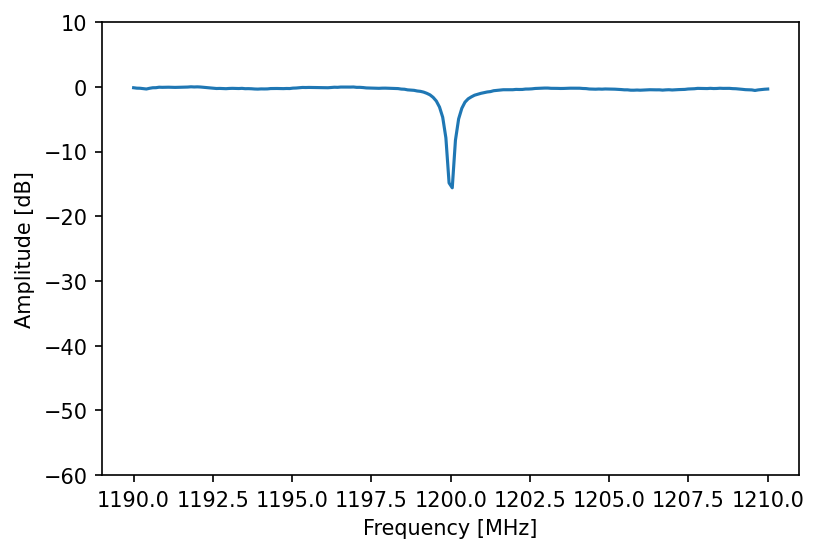

In [13]:
plt.figure(dpi=150)
plt.plot(f,20*np.log10(a/max(a)))
plt.ylim([-60,10])
plt.xlabel("Frequency [MHz]");
plt.ylabel("Amplitude [dB]");

i = 0, fstart = 0.0 MHz, fend = 983.04 MHz.
Starting sweep:
  * Start      : 0.0 MHz
  * End        : 983.04 MHz
  * Resolution : 9.92969696969697 MHz
  * Points     : 100
 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, i = 1, fstart = 983.04 MHz, fend = 1966.08 MHz.
Starting sweep:
  * Start      : 983.04 MHz
  * End        : 1966.08 MHz
  * Resolution : 9.92969696969692 MHz
  * Points     : 100
 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 

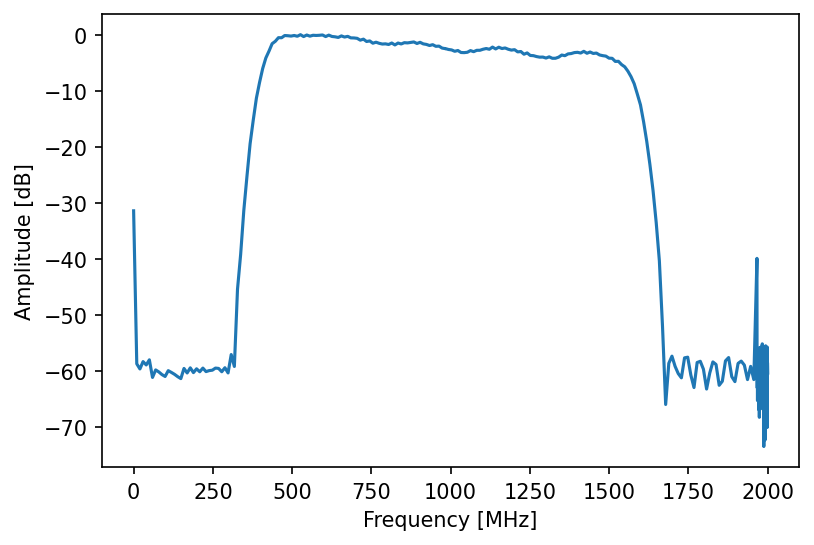

In [6]:
############################
### Wide Frequency Sweep ###
############################
fstart = 0
fend = 2000

chain.analysis.qout(2)
chain.synthesis.qout(2)

# Number of pointes per sweep.
N = 100
#df = 1
#N = int(np.round((fend - fstart)/df))

# Use 80 % the available bandwidth per sweep.
fbw = 0.8*min(chain.analysis.fs,chain.synthesis.fs)

if (fend-fstart)>fbw:
    fstart = np.arange(fstart, fend, fbw)

# Total number  of points.
NT = len(fstart)*N

f_v = np.zeros(NT)
a_v = np.zeros(NT)
phi_v = np.zeros(NT)
for i,ff in enumerate(fstart):
    fend_ = ff+fbw
    if fend_ > fend:
        fend_ = fend
    print("i = {}, fstart = {} MHz, fend = {} MHz.".format(i, ff, fend_))
    
    # Sweep.
    f,a,phi=chain.sweep(ff,fend_,N=N,g=0.05)
    
    # Concat values.
    f_v[i*N:(i+1)*N] = f
    a_v[i*N:(i+1)*N] = a
    phi_v[i*N:(i+1)*N] = phi
    
plt.figure(dpi=150)
plt.plot(f_v,20*np.log10(a_v/max(a_v)))
plt.xlabel("Frequency [MHz]");
plt.ylabel("Amplitude [dB]");
#plt.savefig('wide-vna.jpg')

#plt.figure(dpi=150)
#plt.plot(f_v,phi_v)
#plt.xlabel("Frequency [MHz]");
#plt.ylabel("Phase [rad]");

Spectrum
fstart = 1200 MHz, fend = 1300 MHz, fc = 19.2 MHz
i = 0, fck = 1200.0 MHz
i = 1, fck = 1219.2 MHz
i = 2, fck = 1238.4 MHz
i = 3, fck = 1257.6000000000001 MHz
i = 4, fck = 1276.8000000000002 MHz
i = 5, fck = 1296.0000000000002 MHz


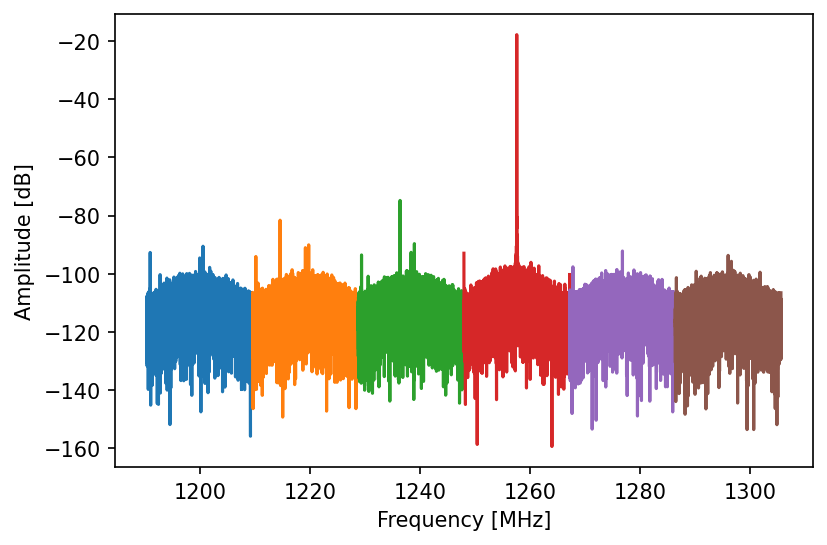

In [76]:
#########################
### Spectrum Analyzer ###
#########################

fmix = 1250
chain.set_mixer_frequency(fmix)

# Data source.
chain.source("product")

# Set output tone.
chain.synthesis.alloff()
chain.set_tone(1250.6, g=0.8)

# Decimation.
chain.set_decimation(2)
chain.analysis.qout(1)

# Frequency range.
fstart = 1200
fend   = 1300
f = np.arange(fstart, fend, chain.analysis.fc_ch)
print("Spectrum")
print("fstart = {} MHz, fend = {} MHz, fc = {} MHz".format(fstart, fend, chain.analysis.fc_ch))

# Set mixer to starting point.
#chain.analysis.set_mixer_frequency(-fstart)

# Frequency and amplitude vectors.
FF = []
AA = []
plt.figure(dpi=150);
for i,fck in enumerate(f):
    print("i = {}, fck = {} MHz".format(i,fck))
    
    # Transfer data.
    [xi,xq] = chain.get_bin(fck)
    x = xi + 1j*xq
    
    # Frequency vector.
    F = (np.arange(len(x))/len(x)-0.5)*chain.analysis.fs_ch    
    
    # Normalization factor.
    NF = (2**15)*len(F)

    w = np.hanning(len(x))
    xw = x*w
    YY = fftshift(fft(xw))
    YYlog = 20*np.log10(abs(YY)/NF)
    AA = np.concatenate((AA,YYlog))
    
    Fk = F+fck
    FF = np.concatenate((FF,Fk))
    plt.plot(Fk,YYlog);
plt.xlabel("Frequency [MHz]");
plt.ylabel("Amplitude [dB]");
#plt.savefig('wide-spectrum.jpg')
#plt.plot(FF,AA);

Starting sweep:
  * Start      : 1150.0 MHz
  * End        : 1250.0 MHz
  * Resolution : 0.1001001001000077 MHz
  * Points     : 1000
 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,

/home/xilinx/jupyter_notebooks/mkids_v2/./soft/mkids.py:1160: RuntimeWarning: Mean of empty slice.
  df = np.diff(f[idx]).mean()
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


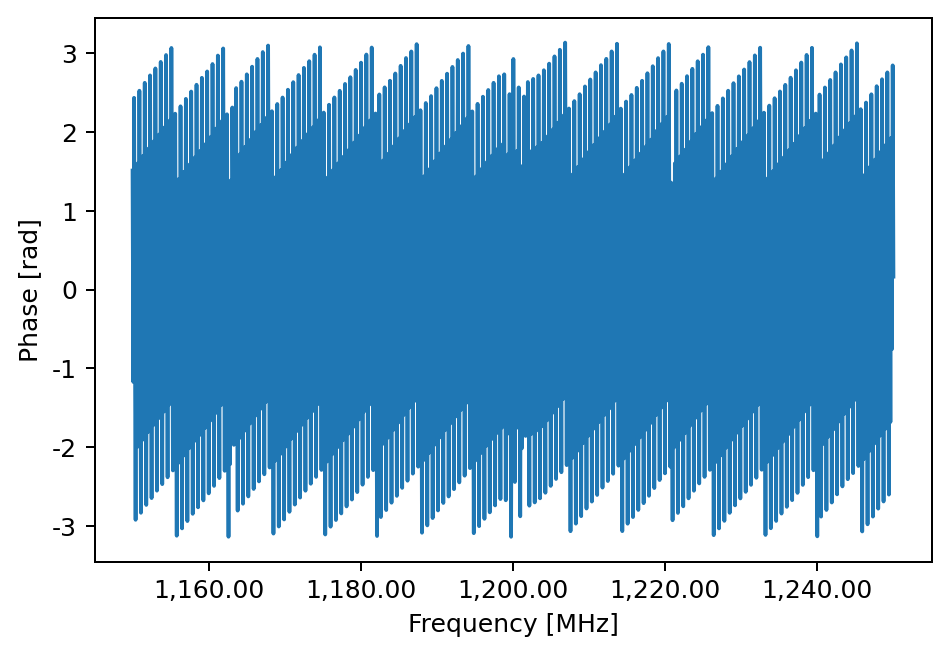

In [54]:
########################
### Delay estimation ###
########################
chain.set_mixer_frequency(1000)

# Delta frequency per sweep.
df = 100

# Number of points per sweep.
N = 1000

# Starting frequency points.
fstart = 1200

# Frequency Sweep.
f,a,phi = chain.sweep(fstart-df/2,fstart+df/2,N=N, g=0.1, set_mixer=False)
df, dt = chain.phase_slope(f, phi)
 
print(" ")
print("df = {} MHz, dt = {} us".format(df, dt))

plt.figure(dpi=180)
plt.plot(f,phi)
plt.xlabel("Frequency [MHz]");
plt.ylabel("Phase [rad]");
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
#plt.savefig('phase-short.jpg')

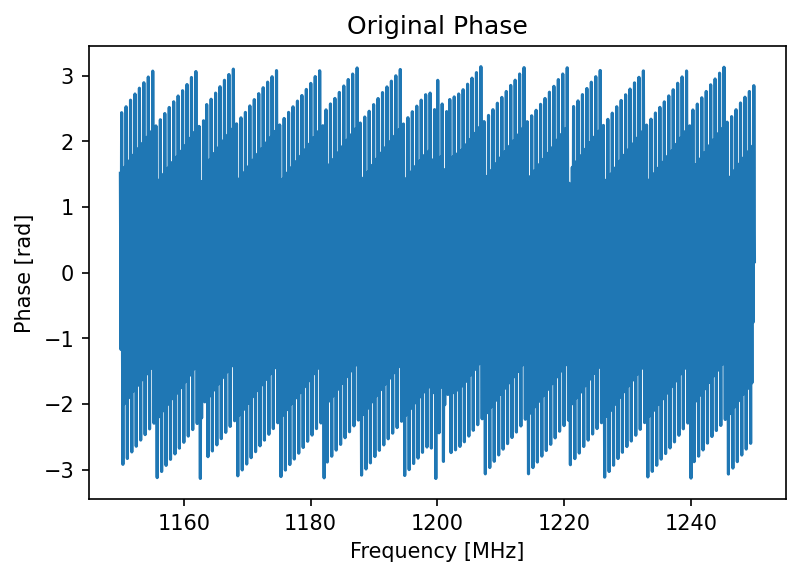

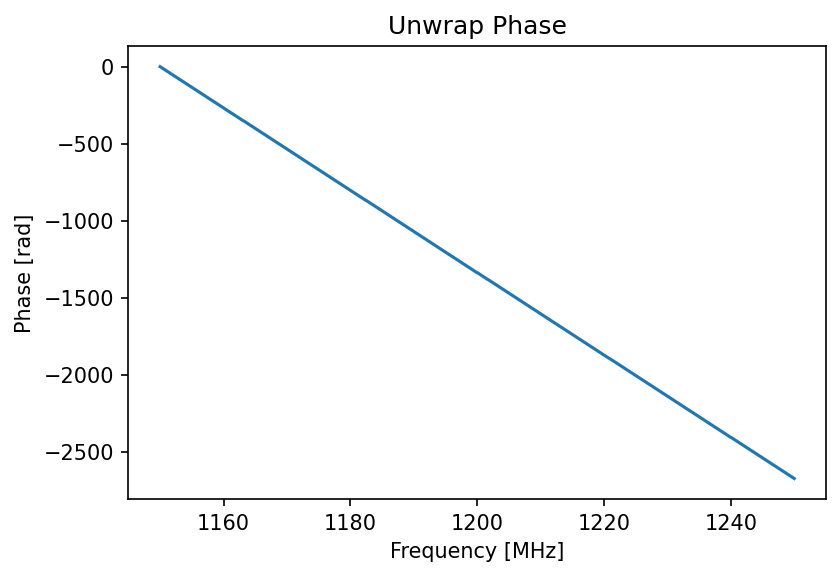

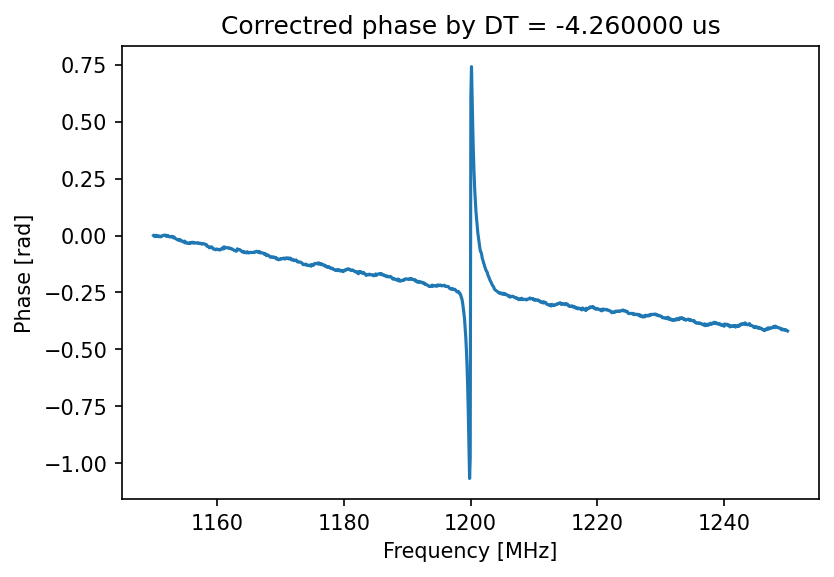

In [55]:
##############################
### Phase Correction by DT ###
##############################
# DT is in us.
DT = -4.23-0.02-0.01

phi_u, phi_dt = chain.phase_correction(f, phi, DT=DT, phase_cal=j_avg)

plt.figure(dpi=150)
plt.plot(f,phi)
plt.xlabel("Frequency [MHz]");
plt.ylabel("Phase [rad]");
plt.title("Original Phase");

plt.figure(dpi=150)
plt.plot(f,phi_u)
plt.xlabel("Frequency [MHz]");
plt.ylabel("Phase [rad]");
plt.title("Unwrap Phase");

plt.figure(dpi=150)
plt.plot(f,phi_dt)
plt.xlabel("Frequency [MHz]");
plt.ylabel("Phase [rad]");
plt.title("Correctred phase by DT = {:.6f} us".format(DT));

Slope = = -0.00030797282754623076 us


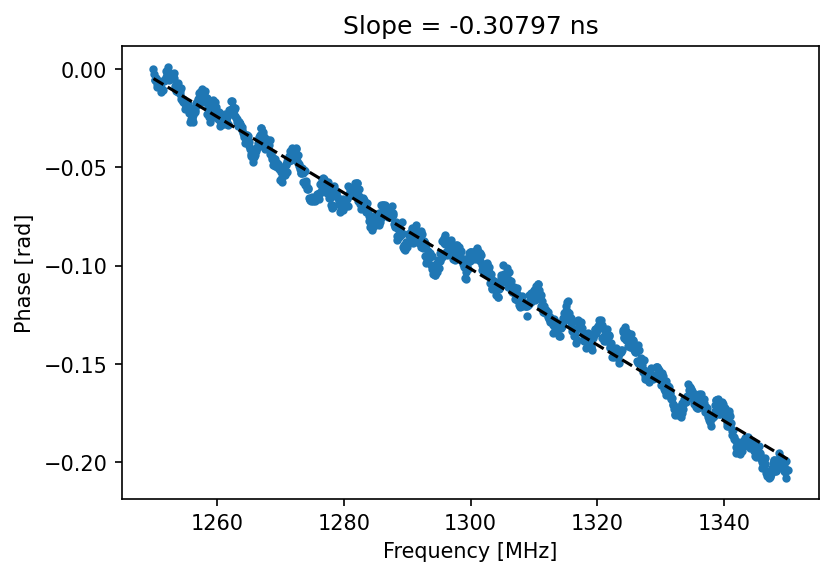

In [53]:
#################################
### Overall delay computation ###
#################################
data = chain.phase_fit(f, phi_dt, jumps=False)

m = data['fits'][0]['slope']
x = data['fits'][0]['data']['x']
y = data['fits'][0]['data']['y']
fn = data['fits'][0]['data']['fn']
    
print("Slope = = {} us".format(m/(2*np.pi)))
plt.figure(dpi=150);
plt.plot(x, y, '.', x, fn, '--k');
plt.xlabel("Frequency [MHz]");
plt.ylabel("Phase [rad]");
plt.title("Slope = {:.5} ns".format(1000*m/(2*np.pi)));
#plt.savefig('phase-slope-2.jpg')

In [49]:
####################################
### Jump-based delay computation ###
####################################
data = chain.phase_fit(f, phi_dt,gap=2)

# Sampling period (ns).
ts = 1000/chain.analysis.fs

m_avg = 0
for i in range(len(data['fits'])):
    m  = data['fits'][i]['slope']
    x  = data['fits'][i]['data']['x']
    y  = data['fits'][i]['data']['y']
    fn = data['fits'][i]['data']['fn']
    
    m_avg = m_avg + m
      
    print("Slope [{}]\t= {:.5f} ns".format(i,1000*m/(2*np.pi)))
    #plt.figure(dpi=180);
    #plt.plot(x, y, '.', x, fn, '--k');
    #plt.xlabel('Frequency [MHz]')
    #plt.ylabel('Phase [rad]')
    #plt.title('Slope [{}] = {:.5} ns'.format(i,1000*m/(2*np.pi)))
    #plt.savefig('phase-slope-jump-{}.jpg'.format(i))
    
m_avg = m_avg/len(data['fits'])
print("Average Slope\t= {:.5f} ns".format(1000*m_avg/(2*np.pi)))
print(" ")
    
for i in range(len(data['jump']['value'])):
    jv = data['jump']['value'][i]
    
    print("Jump [{}]\t= {:.5f} rad, {:.5f} ns, {:5f} samples".format(i, jv, 1000*jv/(2*np.pi), 1000*jv/(2*np.pi*ts)))
    
j_avg = np.mean(data['jump']['value'])
print("Average Jump\t= {:.5f} rad, {:.5f} ns, {:.5f} samples".format(j_avg, 1000*j_avg/(2*np.pi), 1000*j_avg/(2*np.pi*ts)))

Slope [0]	= -10.31230 ns
Slope [1]	= -10.39809 ns
Slope [2]	= -10.31353 ns
Slope [3]	= -10.33801 ns
Slope [4]	= -10.37777 ns
Slope [5]	= -10.45249 ns
Average Slope	= -10.36536 ns
 
Jump [0]	= 1.06905 rad, 170.14481 ns, 209.073945 samples
Jump [1]	= 1.07319 rad, 170.80404 ns, 209.884003 samples
Jump [2]	= 1.06975 rad, 170.25650 ns, 209.211183 samples
Jump [3]	= 1.07446 rad, 171.00621 ns, 210.132428 samples
Jump [4]	= 1.06957 rad, 170.22775 ns, 209.175856 samples
Average Jump	= 1.07121 rad, 170.48786 ns, 209.49548 samples


In [78]:
1/8.6/2

0.05813953488372093